# Model Benchmarking

This notebook will perform exploration via model and model hyperparameter searching of possible shallow models using SKLearn built in algorithms.

I use data constructed by Feature_Engineering.ipynb and model searching functionality from SKL_search.py 

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import warnings
from SKL_search import *
warnings.filterwarnings("ignore")

In [54]:
#untie local dependency
import os
cwd = os.getcwd().split('\\')
local_repo_path = '\\'.join(cwd[:-1])
raw_data_path = local_repo_path + r'\data\raw'
processed_data_path = local_repo_path + '\data\processed'
feature_path = local_repo_path + r'\\data\\features'

# Choose and load feature set to benchmark

In [95]:
output_feature_fname = 'Lookback10'

In [96]:
sj_feature_train = pd.read_csv(feature_path + r'\\sj_train_' + output_feature_fname + '.csv', index_col=0)
sj_feature_test = pd.read_csv(feature_path + r'\\sj_test_' + output_feature_fname + '.csv', index_col=0)
iq_feature_train = pd.read_csv(feature_path + r'\\iq_train_' + output_feature_fname + '.csv', index_col=0)
iq_feature_test = pd.read_csv(feature_path + r'\\iq_test_' + output_feature_fname + '.csv', index_col=0)

In [97]:
from sklearn.model_selection import train_test_split
X_tr_sj, X_val_sj, Y_tr_sj, Y_val_sj = train_test_split(sj_feature_train.drop('total_cases', axis = 1), sj_feature_train['total_cases'], test_size = 0.00, random_state = 4)
X_tr_iq, X_val_iq, Y_tr_iq, Y_val_iq = train_test_split(iq_feature_train.drop('total_cases', axis = 1), iq_feature_train['total_cases'], test_size = 0.00, random_state = 4)

In [98]:
X_tr_sj.head()

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var1(t-9),var2(t-9),var3(t-9),var4(t-9),var5(t-9),...,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1)
102,-1.039605,-1.104390,-1.071975,-1.272727,-0.179855,-0.296286,-0.311080,-0.508423,-1.272727,-0.221996,...,-0.601617,-0.609895,-0.422665,-0.500000,-0.473370,-0.467864,-0.488362,-0.098009,-0.500000,-0.499515
614,0.137865,0.121533,-0.385911,0.000000,0.369460,0.033712,0.025087,-0.692190,0.000000,0.246672,...,-0.804988,-0.820627,-0.961715,-1.000000,-0.179855,-0.797314,-0.812265,-0.771822,-1.000000,-0.221996
717,-0.240921,-0.249199,-0.441041,-0.500000,0.493971,-0.139509,-0.162230,-0.673813,-0.272727,0.369460,...,-0.937097,-1.002369,-1.108729,-1.272727,-0.133839,-0.725504,-0.745366,-0.955590,-1.545455,-0.179855
784,-0.978210,-1.038606,-0.588055,-1.272727,-0.374707,-0.830204,-0.870244,-0.349158,-1.272727,-0.409986,...,-0.061121,-0.057422,0.036753,0.227273,-0.541333,0.268878,0.245296,-0.404288,-0.272727,-0.530953
114,-0.741401,-0.798885,0.067381,0.227273,-0.542448,-0.415239,-0.478328,-0.183767,-0.272727,-0.541333,...,0.374126,0.365714,0.545176,0.500000,-0.250100,0.320406,0.323345,0.863706,1.272727,-0.167904


In [99]:
X_tr_iq.head()

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var1(t-9),var2(t-9),var3(t-9),var4(t-9),var5(t-9),...,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1)
82,0.501477,0.472961,0.044512,-0.357143,0.829325,0.003128,-0.010266,0.709496,0.357143,0.960984,...,-0.614770,-0.629148,1.281886,0.500000,1.109742,-0.361772,-0.370302,0.413199,-0.214286,0.971471
80,0.194961,0.186984,-0.005993,0.000000,0.584410,0.184535,0.188451,0.918250,-0.214286,0.703800,...,0.096264,0.117324,0.423300,1.214286,1.404688,-0.456299,-0.471494,1.450236,-0.214286,1.254148
258,0.229713,0.207516,0.574815,0.214286,-0.073825,0.712772,0.703941,0.120270,0.857143,-0.144613,...,-0.107385,-0.078460,0.000000,-0.285714,-0.468357,0.178975,0.203116,-0.435286,0.500000,-0.490067
423,-0.994961,-0.995784,0.000000,-2.500000,-0.505643,0.012858,0.052796,0.000000,-0.214286,-0.515083,...,-0.176890,-0.167186,-0.132255,-2.000000,-0.409393,-0.279062,-0.248579,0.372795,-1.071429,-0.369755
428,-0.621720,-0.585151,0.000000,-0.214286,-0.491497,-0.407646,-0.425298,-0.940336,-0.357143,-0.470264,...,-0.190096,-0.178185,0.440135,-0.357143,-0.149856,-0.292963,-0.269111,0.271785,-0.428571,-0.079545


# Benchmark SJ city

# SKLearn broad model search

In [100]:
from sklearn.ensemble import (ExtraTreesRegressor, RandomForestRegressor, 
                              AdaBoostRegressor, GradientBoostingRegressor)
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [110]:
models1 = { 
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'LinearRegression': linear_model.LinearRegression()
    #'NNRegressor': neighbors.KNeighborsRegressor()
}

params1 = {  
    'RandomForestRegressor': { 'n_estimators': [1000], 'max_depth':[2,5,10,20], 'max_features':['sqrt', 10, 20]},
    'GradientBoostingRegressor': { 'n_estimators': [1000], 'max_features': ['sqrt',10, 20], 'max_depth': [2,5,10,10] },
    'SVR': [
        {'kernel': ['linear'], 'C': [0.05, 0.01], 'degree':[1], 'epsilon':[0.2, 0.5, 1]}],
    'LinearRegression': {'n_jobs':[-1]}
    #'NNRegressor': {'n_neighbors':[125]}
    
}

In [117]:
sj_helper = EstimatorSelectionHelper(models1, params1)
sj_helper.fit(X_tr_sj, Y_tr_sj, scoring='neg_mean_absolute_error', cv = 2)

Running GridSearchCV for RandomForestRegressor.
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:   18.2s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   21.0s finished


Running GridSearchCV for GradientBoostingRegressor.
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    5.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    6.5s finished


Running GridSearchCV for SVR.
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.9s finished


Running GridSearchCV for LinearRegression.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s finished


In [118]:
sj_skl_models = sj_helper.score_summary(sort_by='mean_score')
sj_skl_models

,estimator,min_score,mean_score,max_score,std_score,C,degree,epsilon,kernel,max_depth,max_features,n_estimators,n_jobs
22,GradientBoostingRegressor,-22.0942,-20.9809,-19.8676,1.11327,NaN,NaN,NaN,NaN,10,10,1000,NaN
18,GradientBoostingRegressor,-21.9029,-21.0248,-20.1466,0.878114,NaN,NaN,NaN,NaN,10,sqrt,1000,NaN
21,GradientBoostingRegressor,-22.3595,-21.169,-19.9785,1.19049,NaN,NaN,NaN,NaN,10,sqrt,1000,NaN
15,GradientBoostingRegressor,-22.7045,-21.1788,-19.6531,1.52571,NaN,NaN,NaN,NaN,5,sqrt,1000,NaN
16,GradientBoostingRegressor,-22.0975,-21.2487,-20.4,0.848772,NaN,NaN,NaN,NaN,5,10,1000,NaN
19,GradientBoostingRegressor,-22.1871,-21.2651,-20.343,0.922049,NaN,NaN,NaN,NaN,10,10,1000,NaN
20,GradientBoostingRegressor,-22.8471,-21.2989,-19.7507,1.54818,NaN,NaN,NaN,NaN,10,20,1000,NaN
23,GradientBoostingRegressor,-22.217,-21.5102,-20.8034,0.706806,NaN,NaN,NaN,NaN,10,20,1000,NaN
9,RandomForestRegressor,-22.7985,-21.5854,-20.3724,1.21302,NaN,NaN,NaN,NaN,20,sqrt,1000,NaN
6,RandomForestRegressor,-22.871,-21.5865,-20.3019,1.28454,NaN,NaN,NaN,NaN,10,sqrt,1000,NaN


In [64]:
def fit_and_predict(train, test, mod):
    mod.fit(train.drop('total_cases', axis = 1), train['total_cases'])
    test_preds = mod.predict(test.drop(['city', 'year', 'weekofyear'], axis = 1))
    train_preds = mod.predict(train.drop('total_cases', axis = 1))
    fig, ax = plt.subplots(figsize = (20,10))
    train_error = np.round(mean_absolute_error(train_preds, train['total_cases']),1)
    pd.DataFrame(train['total_cases']).reset_index(drop = True).plot(ax = ax)
    pd.DataFrame(test_preds).set_index(np.arange(len(train), len(train)+ len(test_preds))).plot(ax = ax)
    pd.DataFrame(train_preds).plot(ax = ax)
    ax.legend(labels = ['True', 'Predicted', 'Fitted'])
    ax.set_title(str(mod).split('(')[0] + ' mean train error: ' + str(train_error))
    return(mod, train_preds, test_preds)

In [82]:
def fit_and_predict_log(train, test, mod):
    mod.fit(train.drop('total_cases', axis = 1), np.log(1+train['total_cases']))
    test_preds = np.exp(mod.predict(test.drop(['city', 'year', 'weekofyear'], axis = 1))) -1
    train_preds = np.exp(mod.predict(train.drop('total_cases', axis = 1))) - 1
    fig, ax = plt.subplots(figsize = (20,10))
    train_error = np.round(mean_absolute_error(train_preds, train['total_cases']),1)
    pd.DataFrame(train['total_cases']).reset_index(drop = True).plot(ax = ax)
    pd.DataFrame(test_preds).set_index(np.arange(len(train), len(train)+ len(test_preds))).plot(ax = ax)
    pd.DataFrame(train_preds).plot(ax = ax)
    ax.legend(labels = ['True', 'Predicted', 'Fitted'])
    ax.set_title(str(mod).split('(')[0] + ' mean train error: ' + str(train_error))
    return(mod, train_preds, test_preds)

In [121]:
SVR_mod = SVR(C = 0.05, degree = 1, epsilon = 0.1, kernel = 'linear')
GB_mod = GradientBoostingRegressor(n_estimators = 1000, max_depth = 10, max_features = 10)
RF_mod = RandomForestRegressor(n_estimators = 1000, max_depth = 20, max_features = 10)
#NN_mod = neighbors.KNeighborsRegressor(n_neighbors = 2)
#MLP_NN = MLPRegressor((100), max_iter = 1000,learning_rate = 'invscaling', activation = 'relu')

# Fit and predict with Random Forest Regressor for sj

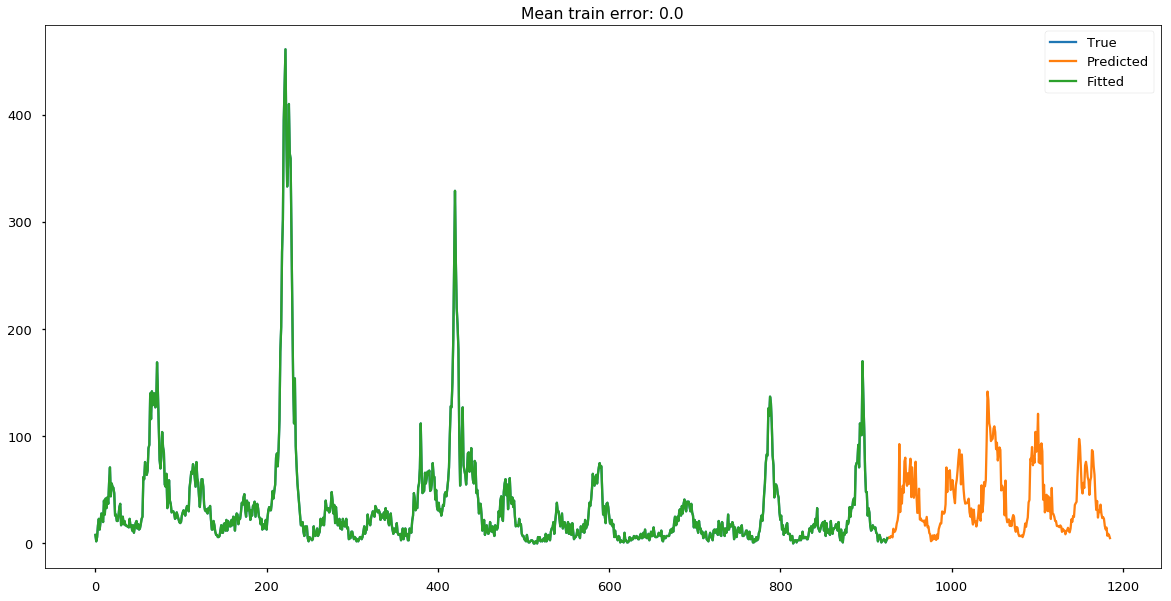

In [124]:
sj_GB_mod, sj_GB_fitted_vals, sj_GB_test_preds = fit_and_predict(sj_feature_train, sj_feature_test, GB_mod)

# Fit and predict with Gradient Boosted Regressor for iq

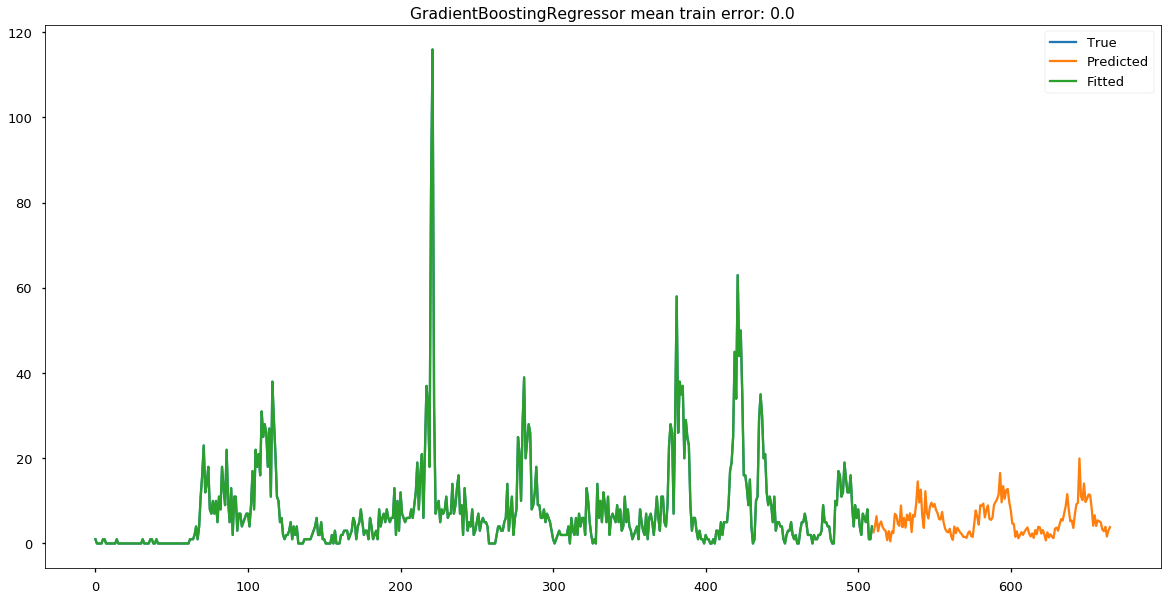

In [123]:
iq_GB_mod, iq_GB_fitted_vals, iq_GB_test_preds = fit_and_predict_log(iq_feature_train, iq_feature_test, GB_mod)

# Fit and predict with SVR for sj

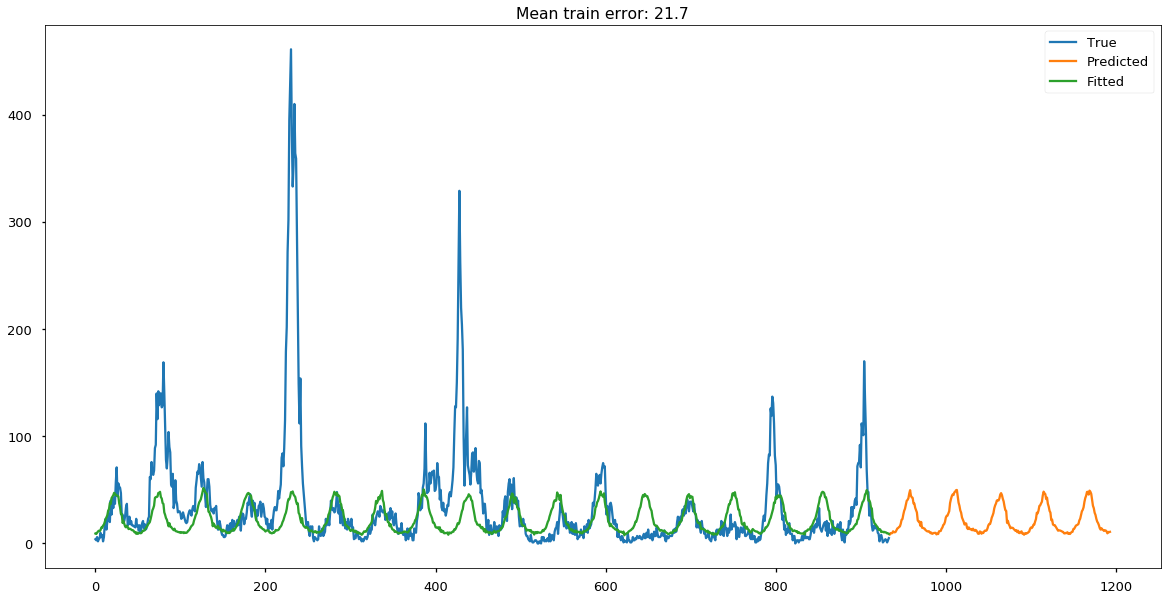

In [73]:
sj_SVR_mod, sj_SVR_fitted_vals, sj_SVR_test_preds = fit_and_predict_log(sj_feature_train, sj_feature_test, SVR_mod)

# Fit and predict with SVR for iq

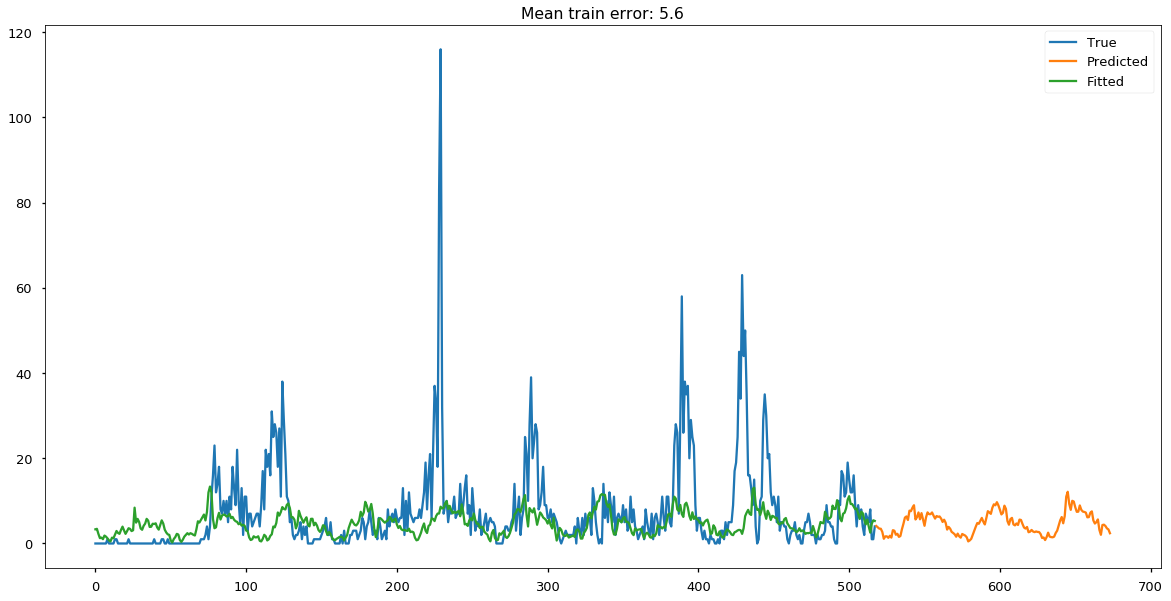

In [74]:
iq_SVR_mod, iq_SVR_fitted_vals, iq_SVR_test_preds = fit_and_predict_log(iq_feature_train, iq_feature_test, SVR_mod)

# Poisson Regression using Statsmodels

# Negative Binomial GLM using Statsmodels

In [58]:
import statsmodels.api as sm
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

In [59]:
X_tr_sj.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)]
X_val_sj.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)]
sj_feature_test.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(sj_feature_test.columns)]

In [60]:
formula = ' + '.join([str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)])
formula = 'y ~ ' + formula
X_tr_sj['y'] = Y_tr_sj
X_val_sj['y'] = Y_val_sj

In [63]:
formula

'y ~ var1(t-10) + var2(t-10) + var3(t-10) + var4(t-10) + var5(t-10) + var1(t-9) + var2(t-9) + var3(t-9) + var4(t-9) + var5(t-9) + var1(t-8) + var2(t-8) + var3(t-8) + var4(t-8) + var5(t-8) + var1(t-7) + var2(t-7) + var3(t-7) + var4(t-7) + var5(t-7) + var1(t-6) + var2(t-6) + var3(t-6) + var4(t-6) + var5(t-6) + var1(t-5) + var2(t-5) + var3(t-5) + var4(t-5) + var5(t-5) + var1(t-4) + var2(t-4) + var3(t-4) + var4(t-4) + var5(t-4) + var1(t-3) + var2(t-3) + var3(t-3) + var4(t-3) + var5(t-3) + var1(t-2) + var2(t-2) + var3(t-2) + var4(t-2) + var5(t-2) + var1(t-1) + var2(t-1) + var3(t-1) + var4(t-1) + var5(t-1)'

In [61]:
model = smf.glm(formula=formula,
                data=X_tr_sj,
                family=sm.families.NegativeBinomial(alpha = 1e-8))
model = model.fit()

predictions_sj = model.predict(X_val_sj).astype(int)
print ("cv error:", mean_absolute_error(predictions_sj, Y_val_sj))

pred_train_sj = model.predict(X_tr_sj).astype(int)
print ("train error:", mean_absolute_error(pred_train_sj, Y_tr_sj))

PatsyError: Error evaluating factor: NameError: name 'var3' is not defined
    y ~ var1(t-10) + var2(t-10) + var3(t-10) + var4(t-10) + var5(t-10) + var1(t-9) + var2(t-9) + var3(t-9) + var4(t-9) + var5(t-9) + var1(t-8) + var2(t-8) + var3(t-8) + var4(t-8) + var5(t-8) + var1(t-7) + var2(t-7) + var3(t-7) + var4(t-7) + var5(t-7) + var1(t-6) + var2(t-6) + var3(t-6) + var4(t-6) + var5(t-6) + var1(t-5) + var2(t-5) + var3(t-5) + var4(t-5) + var5(t-5) + var1(t-4) + var2(t-4) + var3(t-4) + var4(t-4) + var5(t-4) + var1(t-3) + var2(t-3) + var3(t-3) + var4(t-3) + var5(t-3) + var1(t-2) + var2(t-2) + var3(t-2) + var4(t-2) + var5(t-2) + var1(t-1) + var2(t-1) + var3(t-1) + var4(t-1) + var5(t-1)
                                                                                                 ^^^^^^^^^